In [1]:
!pip install xlsxwriter
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [3]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for
import math #The Python math module
import datetime
import time
import os
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
sns.set()

In [42]:
start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime.now().date()
aapl = yf.Ticker("AAPL")
data = yf.download("AAPL", start=start_date, end=end_date)
df = pd.DataFrame(data)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831589,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824474,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014111,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481068,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.327000,82271200
...,...,...,...,...,...,...
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700


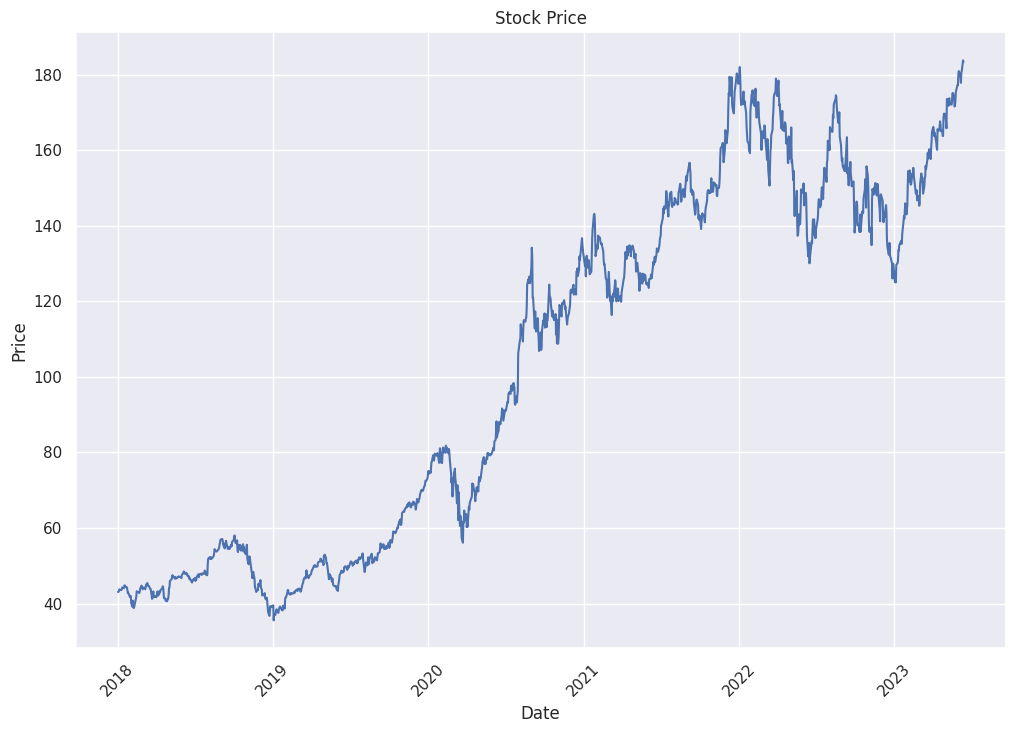

In [5]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'])
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
import plotly.graph_objects as go


In [69]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.3 MB/s eta 0:00:00


In [70]:
import mplfinance as mpf

In [66]:
high_prices = df['High']
close_prices = df['Close']
low_prices = df['Low']
dates = df.index  # contains datetime objects

In [67]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
period9_high = high_prices.rolling(window=9).max()
period9_low = low_prices.rolling(window=9).min()
tenkan_sen = (period9_high + period9_low) / 2

# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = high_prices.rolling(window=26).max()
period26_low = low_prices.rolling(window=26).min()
kijun_sen = (period26_high + period26_low) / 2

# Senkou Span A (Leading Span A): (Conversion Line + Base Line)/2))
senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)

# Senkou Span B (Leading Span B): (52-period high + 52-period low)/2))
period52_high = high_prices.rolling(window=52).max()
period52_low = low_prices.rolling(window=52).min()
senkou_span_b = ((period52_high + period52_low) / 2).shift(26)

# The most current closing price plotted 22 time periods behind (optional)
chikou_span = close_prices.shift(-22) # 22 according to investopedia

In [82]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df is your dataframe with columns: 'Open', 'High', 'Low', 'Close'
# and that it is indexed by date (which should be in datetime format)

# Compute the Ichimoku Cloud data
high_prices = df['High']
low_prices = df['Low']

nine_period_high = high_prices.rolling(window=9).max()
nine_period_low = low_prices.rolling(window=9).min()
tenkan_sen = (nine_period_high + nine_period_low) / 2

twenty_six_period_high = high_prices.rolling(window=26).max()
twenty_six_period_low = low_prices.rolling(window=26).min()
kijun_sen = (twenty_six_period_high + twenty_six_period_low) / 2

senkou_span_a = ((tenkan_sen + kijun_sen) / 2).shift(26)
senkou_span_b = ((twenty_six_period_high + twenty_six_period_low) / 2).shift(26)

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Create a candlestick trace
trace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name='Candlesticks'
)

# Create Ichimoku Cloud traces
tenkan_trace = go.Scatter(x=df.index, y=tenkan_sen, mode='lines', name='Tenkan Sen', line=dict(color='blue'))
kijun_trace = go.Scatter(x=df.index, y=kijun_sen, mode='lines', name='Kijun Sen', line=dict(color='red'))
senkou_a_trace = go.Scatter(x=df.index, y=senkou_span_a, mode='lines', name='Senkou Span A', fill='tonexty', line=dict(color='green'))
senkou_b_trace = go.Scatter(x=df.index, y=senkou_span_b, mode='lines', name='Senkou Span B', fill='tonexty', line=dict(color='orange'))

# Add traces to the main plot
fig.add_trace(trace, row=1, col=1)
fig.add_trace(tenkan_trace, row=1, col=1)
fig.add_trace(kijun_trace, row=1, col=1)
fig.add_trace(senkou_a_trace, row=1, col=1)
fig.add_trace(senkou_b_trace, row=1, col=1)

# Create volume trace (bar chart)
volume_trace = go.Bar(x=df.index, y=df['Volume'], name='Volume', marker=dict(color='gray'))

# Add volume trace to the subplot
fig.add_trace(volume_trace, row=2, col=1)

# Update layout
fig.update_layout(
    title='Stock Prices with Ichimoku Cloud and Trading Volume',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    height=600,  # Adjust the height of the plot
    width=1000   # Adjust the width of the plot
)

# Display the figure
fig.show()


In [8]:
minmax = MinMaxScaler().fit(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = minmax.transform(df.iloc[:, 4:5].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.044268
1,0.044221
2,0.045488
3,0.048610
4,0.047580


In [9]:
df.columns = df.columns.str.replace(' ', '_')
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.831589,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.824474,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.014103,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.481068,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.327003,82271200
...,...,...,...,...,...,...
2023-06-07,178.440002,181.210007,177.320007,177.820007,177.820007,61944600
2023-06-08,177.899994,180.839996,177.460007,180.570007,180.570007,50214900
2023-06-09,181.500000,182.229996,180.630005,180.960007,180.960007,48870700


In [10]:
# remove columns which our neural network will not use
init_df = df.drop(['Open', 'High', 'Low', 'Adj_Close', 'Volume'], axis=1)
# create the column 'date' based on index column
init_df['date'] = df.index

In [11]:
init_df

,Close,date
Date,,
2018-01-02,43.064999,2018-01-02
2018-01-03,43.057499,2018-01-03
2018-01-04,43.257500,2018-01-04
2018-01-05,43.750000,2018-01-05
2018-01-08,43.587502,2018-01-08
...,...,...
2023-06-07,177.820007,2023-06-07
2023-06-08,180.570007,2023-06-08
2023-06-09,180.960007,2023-06-09


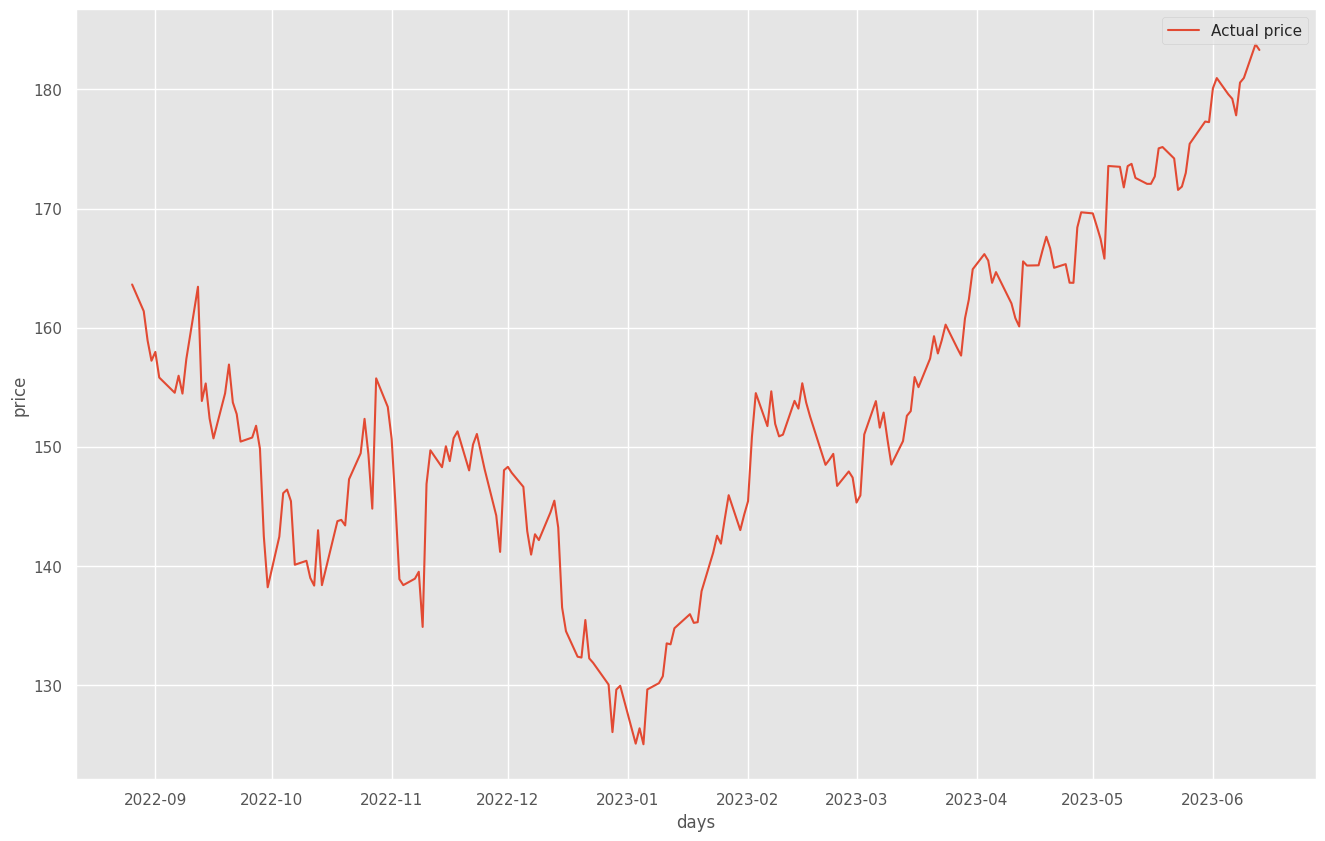

In [12]:
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(init_df['Close'][-200:])
plt.xlabel("days")
plt.ylabel("price")
plt.legend([f'Actual price'])
plt.show()

In [13]:
import numpy as np
import time as tm
import datetime as dt
import tensorflow as tf

# Data preparation
from sklearn.preprocessing import MinMaxScaler
from collections import deque

# AI
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Graphics library
import matplotlib.pyplot as plt

In [23]:
# SETTINGS

# Window size or the sequence length, 7 (1 week)
N_STEPS = 7

# Lookup steps, 1 is the next day, 3 = after tomorrow
LOOKUP_STEPS = [1, 2, 3]

# Stock ticker, AAPL
STOCK = 'AAPL'

# Current date
date_now = tm.strftime('%Y-%m-%d')
date_3_years_back = (dt.date.today() - dt.timedelta(days=1104)).strftime('%Y-%m-%d')

In [15]:
# Scale data for ML engine
scaler = MinMaxScaler()
init_df['scaled_close'] = scaler.fit_transform(np.expand_dims(init_df['Close'].values, axis=1))
init_df

,Close,date,scaled_close
Date,,,
2018-01-02,43.064999,2018-01-02,0.050711
2018-01-03,43.057499,2018-01-03,0.050660
2018-01-04,43.257500,2018-01-04,0.052009
2018-01-05,43.750000,2018-01-05,0.055332
2018-01-08,43.587502,2018-01-08,0.054235
...,...,...,...
2023-06-07,177.820007,2023-06-07,0.959728
2023-06-08,180.570007,2023-06-08,0.978279
2023-06-09,180.960007,2023-06-09,0.980910


In [16]:
def PrepareData(days):
  df = init_df.copy()
  df['future'] = df['scaled_close'].shift(-days)
  last_sequence = np.array(df[['scaled_close']].tail(days))
  df.dropna(inplace=True)
  sequence_data = []
  sequences = deque(maxlen=N_STEPS)

  for entry, target in zip(df[['scaled_close'] + ['date']].values, df['future'].values):
      sequences.append(entry)
      if len(sequences) == N_STEPS:
          sequence_data.append([np.array(sequences), target])

  last_sequence = list([s[:len(['scaled_close'])] for s in sequences]) + list(last_sequence)
  last_sequence = np.array(last_sequence).astype(np.float32)

  # construct the X's and Y's
  X, Y = [], []
  for seq, target in sequence_data:
      X.append(seq)
      Y.append(target)

  # convert to numpy arrays
  X = np.array(X)
  Y = np.array(Y)

  return df, last_sequence, X, Y

In [17]:
PrepareData(3) # 3 days

(                 Close       date  scaled_close    future
 Date                                                     
 2018-01-02   43.064999 2018-01-02      0.050711  0.055332
 2018-01-03   43.057499 2018-01-03      0.050660  0.054235
 2018-01-04   43.257500 2018-01-04      0.052009  0.054202
 2018-01-05   43.750000 2018-01-05      0.055332  0.054134
 2018-01-08   43.587502 2018-01-08      0.054235  0.055804
 ...                ...        ...           ...       ...
 2023-06-02  180.949997 2023-06-02      0.980842  0.959728
 2023-06-05  179.580002 2023-06-05      0.971601  0.978279
 2023-06-06  179.210007 2023-06-06      0.969105  0.980910
 2023-06-07  177.820007 2023-06-07      0.959728  1.000000
 2023-06-08  180.570007 2023-06-08      0.978279  0.996762
 
 [1368 rows x 4 columns],
 array([[0.9417846 ],
        [0.9353087 ],
        [0.9175001 ],
        [0.91938883],
        [0.9271465 ],
        [0.9436059 ],
        [0.95622045],
        [0.95588315],
        [0.9750409 ],
       

In [18]:
def GetTrainedModel(x_train, y_train):
  model = Sequential()
  model.add(LSTM(60, return_sequences=True, input_shape=(N_STEPS, len(['close']))))
  model.add(Dropout(0.3))
  model.add(LSTM(120, return_sequences=False))
  model.add(Dropout(0.3))
  model.add(Dense(20))
  model.add(Dense(1))

  BATCH_SIZE = 8
  EPOCHS = 80

  model.compile(loss='mean_squared_error', optimizer='adam')

  model.fit(x_train, y_train,
            batch_size=BATCH_SIZE,
            epochs=EPOCHS,
            verbose=1)

  model.summary()

  return model

In [25]:
# GET PREDICTIONS
predictions = []

for step in LOOKUP_STEPS:
  df, last_sequence, x_train, y_train = PrepareData(step)
  x_train = x_train[:, :, :len(['Close'])].astype(np.float32)

  model = GetTrainedModel(x_train, y_train)

  last_sequence = last_sequence[-N_STEPS:]
  last_sequence = np.expand_dims(last_sequence, axis=0)
  prediction = model.predict(last_sequence)
  predicted_price = scaler.inverse_transform(prediction)[0][0]

  predictions.append(round(float(predicted_price), 2))

Epoch 1/80
171/171 [==============================] - 11s 24ms/step - loss: 0.0121
Epoch 2/80
171/171 [==============================] - 4s 26ms/step - loss: 0.0029
Epoch 3/80
171/171 [==============================] - 4s 22ms/step - loss: 0.0031
Epoch 4/80
171/171 [==============================] - 4s 26ms/step - loss: 0.0021
Epoch 5/80
171/171 [==============================] - 5s 29ms/step - loss: 0.0019
Epoch 6/80
171/171 [==============================] - 4s 21ms/step - loss: 0.0021
Epoch 7/80
171/171 [==============================] - 2s 13ms/step - loss: 0.0020
Epoch 8/80
171/171 [==============================] - 2s 13ms/step - loss: 0.0018
Epoch 9/80
171/171 [==============================] - 3s 15ms/step - loss: 0.0017
Epoch 10/80
171/171 [==============================] - 3s 15ms/step - loss: 0.0016
Epoch 11/80
171/171 [==============================] - 2s 13ms/step - loss: 0.0017
Epoch 12/80
171/171 [==============================] - 2s 12ms/step - loss: 0.0015
Epoch 13/80


In [26]:
if bool(predictions) == True and len(predictions) > 0:
  predictions_list = [str(d)+'$' for d in predictions]
  predictions_str = ', '.join(predictions_list)
  message = f'{STOCK} prediction for upcoming 3 days ({predictions_str})'

  print(message)

AAPL prediction for upcoming 3 days (180.88$, 182.6$, 181.16$)


In [27]:
# Execute model for the whole history range
copy_df = init_df.copy()
y_predicted = model.predict(x_train)
y_predicted_transformed = np.squeeze(scaler.inverse_transform(y_predicted))
first_seq = scaler.inverse_transform(np.expand_dims(y_train[:6], axis=1))
last_seq = scaler.inverse_transform(np.expand_dims(y_train[-3:], axis=1))
y_predicted_transformed = np.append(first_seq, y_predicted_transformed)
y_predicted_transformed = np.append(y_predicted_transformed, last_seq)
copy_df[f'predicted_close'] = y_predicted_transformed

43/43 [==============================] - 0s 9ms/step


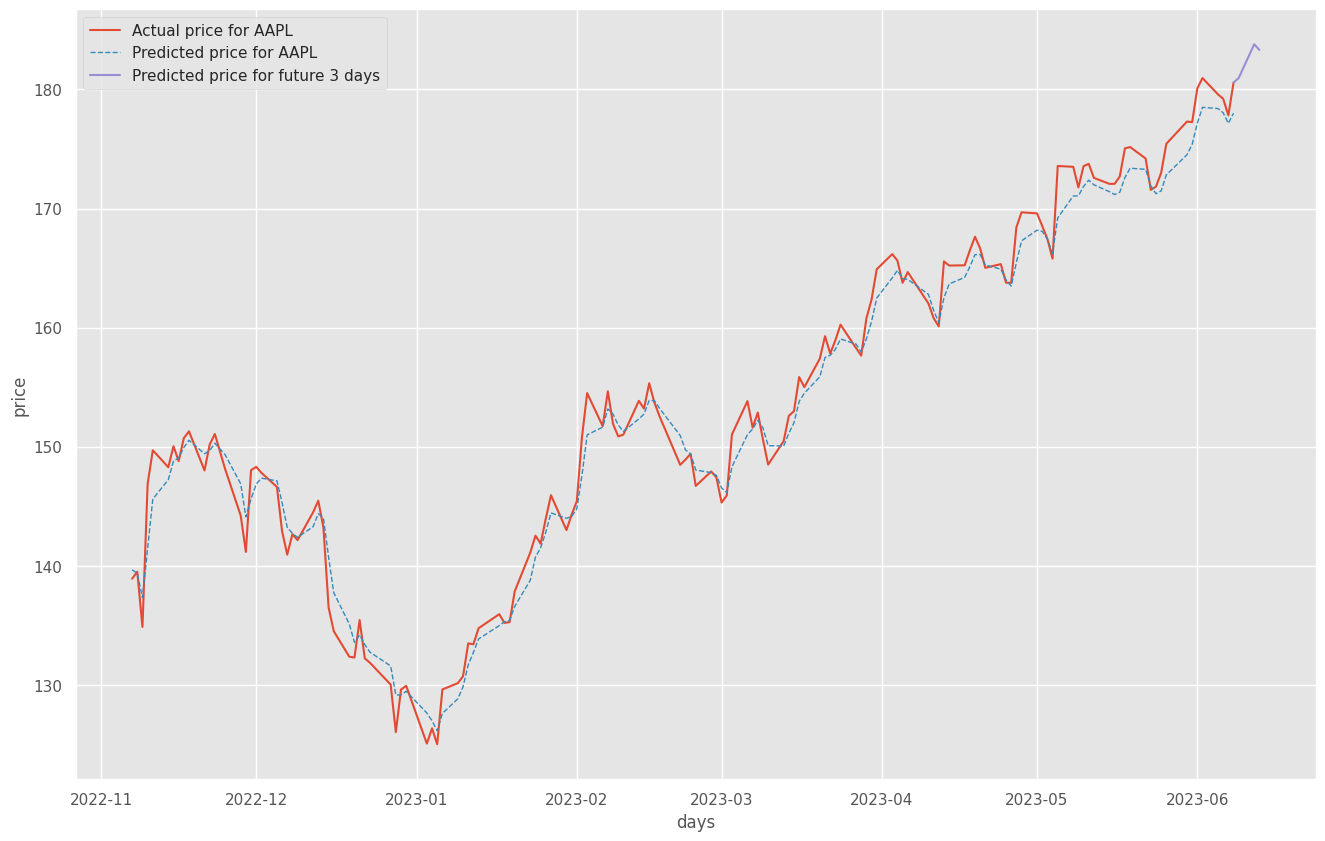

In [28]:
# Result chart
plt.style.use(style='ggplot')
plt.figure(figsize=(16,10))
plt.plot(copy_df['Close'][-150:].head(147))
plt.plot(copy_df['predicted_close'][-150:].head(147), linewidth=1, linestyle='dashed')
plt.plot(copy_df['Close'][-150:].tail(4))
plt.xlabel('days')
plt.ylabel('price')
plt.legend([f'Actual price for {STOCK}',
            f'Predicted price for {STOCK}',
            f'Predicted price for future 3 days'])
plt.show()

In [29]:
# Add predicted results to the table
date_now = dt.date.today()
date_tomorrow = dt.date.today() + dt.timedelta(days=1)
date_after_tomorrow = dt.date.today() + dt.timedelta(days=2)

copy_df.loc[date_now] = [predictions[0], f'{date_now}', 0, 0]
copy_df.loc[date_tomorrow] = [predictions[1], f'{date_tomorrow}', 0, 0]
copy_df.loc[date_after_tomorrow] = [predictions[2], f'{date_after_tomorrow}', 0, 0]

<ipython-input-29-ca1349af6c77>:7: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.

<ipython-input-29-ca1349af6c77>:8: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



In [30]:
copy_df

,Close,date,scaled_close,predicted_close
Date,,,,
2018-01-02 00:00:00,43.064999,2018-01-02 00:00:00,0.050711,44.047501
2018-01-03 00:00:00,43.057499,2018-01-03 00:00:00,0.050660,44.775002
2018-01-04 00:00:00,43.257500,2018-01-04 00:00:00,0.052009,44.814999
2018-01-05 00:00:00,43.750000,2018-01-05 00:00:00,0.055332,44.615002
2018-01-08 00:00:00,43.587502,2018-01-08 00:00:00,0.054235,44.250000
...,...,...,...,...
2023-06-12 00:00:00,183.789993,2023-06-12 00:00:00,1.000000,183.789993
2023-06-13 00:00:00,183.309998,2023-06-13 00:00:00,0.996762,183.309998
2023-06-14,180.880000,2023-06-14,0.000000,0.000000


In [43]:
copy_df_1 = df.copy()

In [31]:
close = copy_df.Close.values.tolist()
initial_money = 10000
window_size = 30
skip = 1

In [32]:
class neuralnetwork:
    def __init__(self, id_, hidden_size = 128):
        self.W1 = np.random.randn(window_size, hidden_size) / np.sqrt(window_size)
        self.W2 = np.random.randn(hidden_size, 3) / np.sqrt(hidden_size)
        self.fitness = 0
        self.id = id_

def relu(X):
    return np.maximum(X, 0)

def softmax(X):
    e_x = np.exp(X - np.max(X, axis=-1, keepdims=True))
    return e_x / np.sum(e_x, axis=-1, keepdims=True)

def feed_forward(X, nets):
    a1 = np.dot(X, nets.W1)
    z1 = relu(a1)
    a2 = np.dot(z1, nets.W2)
    return softmax(a2)

In [33]:
class NeuroEvolution:
    def __init__(self, population_size, mutation_rate, model_generator,
                state_size, window_size, trend, skip, initial_money):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.model_generator = model_generator
        self.state_size = state_size
        self.window_size = window_size
        self.half_window = window_size // 2
        self.trend = trend
        self.skip = skip
        self.initial_money = initial_money

    def _initialize_population(self):
        self.population = []
        for i in range(self.population_size):
            self.population.append(self.model_generator(i))

    def mutate(self, individual, scale=1.0):
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W1.shape)
        individual.W1 += np.random.normal(loc=0, scale=scale, size=individual.W1.shape) * mutation_mask
        mutation_mask = np.random.binomial(1, p=self.mutation_rate, size=individual.W2.shape)
        individual.W2 += np.random.normal(loc=0, scale=scale, size=individual.W2.shape) * mutation_mask
        return individual

    def inherit_weights(self, parent, child):
        child.W1 = parent.W1.copy()
        child.W2 = parent.W2.copy()
        return child

    def crossover(self, parent1, parent2):
        child1 = self.model_generator((parent1.id+1)*10)
        child1 = self.inherit_weights(parent1, child1)
        child2 = self.model_generator((parent2.id+1)*10)
        child2 = self.inherit_weights(parent2, child2)
        # first W
        n_neurons = child1.W1.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W1[:, cutoff:] = parent2.W1[:, cutoff:].copy()
        child2.W1[:, cutoff:] = parent1.W1[:, cutoff:].copy()
        # second W
        n_neurons = child1.W2.shape[1]
        cutoff = np.random.randint(0, n_neurons)
        child1.W2[:, cutoff:] = parent2.W2[:, cutoff:].copy()
        child2.W2[:, cutoff:] = parent1.W2[:, cutoff:].copy()
        return child1, child2

    def get_state(self, t):
        window_size = self.window_size + 1
        d = t - window_size + 1
        block = self.trend[d : t + 1] if d >= 0 else -d * [self.trend[0]] + self.trend[0 : t + 1]
        res = []
        for i in range(window_size - 1):
            res.append(block[i + 1] - block[i])
        return np.array([res])

    def act(self, p, state):
        logits = feed_forward(state, p)
        return np.argmax(logits, 1)[0]

    def buy(self, individual):
        initial_money = self.initial_money
        starting_money = initial_money
        state = self.get_state(0)
        inventory = []
        states_sell = []
        states_buy = []

        for t in range(0, len(self.trend) - 1, self.skip):
            action = self.act(individual, state)
            next_state = self.get_state(t + 1)

            if action == 1 and starting_money >= self.trend[t]:
                inventory.append(self.trend[t])
                initial_money -= self.trend[t]
                states_buy.append(t)
                print('day %d: buy 1 unit at price %f, total balance %f'% (t, self.trend[t], initial_money))

            elif action == 2 and len(inventory):
                bought_price = inventory.pop(0)
                initial_money += self.trend[t]
                states_sell.append(t)
                try:
                    invest = ((self.trend[t] - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell 1 unit at price %f, investment %f %%, total balance %f,'
                    % (t, self.trend[t], invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        total_gains = initial_money - starting_money
        return states_buy, states_sell, total_gains, invest

    def calculate_fitness(self):
        for i in range(self.population_size):
            initial_money = self.initial_money
            starting_money = initial_money
            state = self.get_state(0)
            inventory = []

            for t in range(0, len(self.trend) - 1, self.skip):
                action = self.act(self.population[i], state)
                next_state = self.get_state(t + 1)

                if action == 1 and starting_money >= self.trend[t]:
                    inventory.append(self.trend[t])
                    starting_money -= self.trend[t]

                elif action == 2 and len(inventory):
                    bought_price = inventory.pop(0)
                    starting_money += self.trend[t]

                state = next_state
            invest = ((starting_money - initial_money) / initial_money) * 100
            self.population[i].fitness = invest

    def evolve(self, generations=20, checkpoint= 5):
        self._initialize_population()
        n_winners = int(self.population_size * 0.4)
        n_parents = self.population_size - n_winners
        for epoch in range(generations):
            self.calculate_fitness()
            fitnesses = [i.fitness for i in self.population]
            sort_fitness = np.argsort(fitnesses)[::-1]
            self.population = [self.population[i] for i in sort_fitness]
            fittest_individual = self.population[0]
            if (epoch+1) % checkpoint == 0:
                print('epoch %d, fittest individual %d with accuracy %f'%(epoch+1, sort_fitness[0],
                                                                          fittest_individual.fitness))
            next_population = [self.population[i] for i in range(n_winners)]
            total_fitness = np.sum([np.abs(i.fitness) for i in self.population])
            parent_probabilities = [np.abs(i.fitness / total_fitness) for i in self.population]
            parents = np.random.choice(self.population, size=n_parents, p=parent_probabilities, replace=False)
            for i in np.arange(0, len(parents), 2):
                child1, child2 = self.crossover(parents[i], parents[i+1])
                next_population += [self.mutate(child1), self.mutate(child2)]
            self.population = next_population
        return fittest_individual

In [34]:
population_size = 100
generations = 100
mutation_rate = 0.1
neural_evolve = NeuroEvolution(population_size, mutation_rate, neuralnetwork,
                              window_size, window_size, close, skip, initial_money)

In [35]:
fittest_nets = neural_evolve.evolve(50)

epoch 5, fittest individual 0 with accuracy 17.322750
epoch 10, fittest individual 0 with accuracy 23.841499
epoch 15, fittest individual 0 with accuracy 23.841499
epoch 20, fittest individual 0 with accuracy 23.841499
epoch 25, fittest individual 0 with accuracy 23.841499
epoch 30, fittest individual 0 with accuracy 23.841499
epoch 35, fittest individual 0 with accuracy 23.841499
epoch 40, fittest individual 0 with accuracy 23.841499
epoch 45, fittest individual 0 with accuracy 23.841499
epoch 50, fittest individual 0 with accuracy 23.841499


In [36]:
states_buy, states_sell, total_gains, invest = neural_evolve.buy(fittest_nets)


day 2: buy 1 unit at price 43.257500, total balance 9956.742500
day 3, sell 1 unit at price 43.750000, investment 1.138532 %, total balance 10000.492500,
day 14: buy 1 unit at price 44.259998, total balance 9956.232502
day 15: buy 1 unit at price 43.555000, total balance 9912.677502
day 17: buy 1 unit at price 42.877499, total balance 9869.800003
day 20: buy 1 unit at price 41.857498, total balance 9827.942505
day 24: buy 1 unit at price 40.757500, total balance 9787.185005
day 27, sell 1 unit at price 39.102501, investment -11.652728 %, total balance 9826.287506,
day 29, sell 1 unit at price 41.084999, investment -5.670993 %, total balance 9867.372505,
day 30, sell 1 unit at price 41.842499, investment -2.413853 %, total balance 9909.215004,
day 33, sell 1 unit at price 42.962502, investment 2.639917 %, total balance 9952.177505,
day 34, sell 1 unit at price 42.767502, investment 4.931613 %, total balance 9994.945007,
day 48: buy 1 unit at price 44.992500, total balance 9949.952507
da

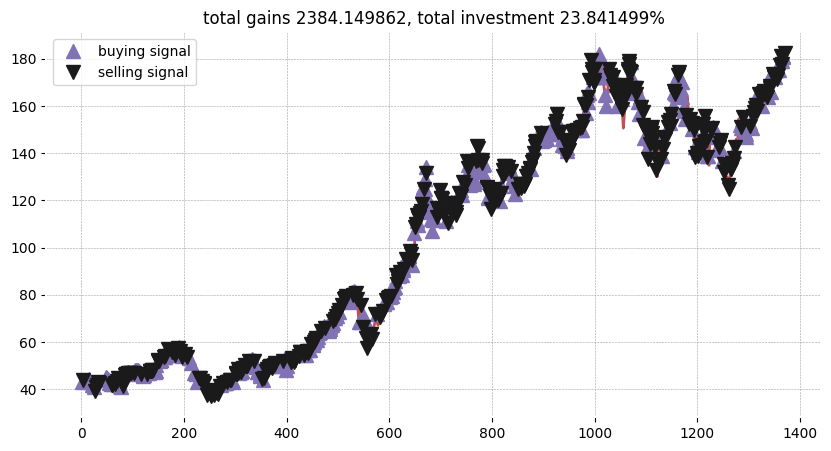

In [85]:
fig = plt.figure(figsize = (10, 5))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label='buying signal', markevery=states_buy)
plt.plot(close, 'v', markersize=10, color='k', label='selling signal', markevery=states_sell)
plt.title('total gains %f, total investment %f%%' % (total_gains, invest))
plt.legend()
plt.show()

In [38]:
aapl = yf.Ticker("AAPL")
aapl.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [86]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.3 MB/s eta 0:00:00


In [87]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')


In [93]:
stock_info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [ ]:
!pip install openai

In [113]:
import os
import openai

# Set OpenAI API key
openai.api_key = 'SETOPENAIAPIKEY'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [121]:
stock_info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscriptio

In [124]:
# Fetch stock info
aapl = yf.Ticker("AAPL")
stock_info = aapl.info

# Select a subset of the stock info
selected_info = {
    'name': stock_info.get('shortName'),
    'marketCap': stock_info.get('marketCap'),
    'currentPrice': stock_info.get('currentPrice'),
    'fiftyDayAverage': stock_info.get('fiftyDayAverage'),
    'twoHundredDayAverage': stock_info.get('twoHundredDayAverage'),
    'trailingAnnualDividendRate': stock_info.get('trailingAnnualDividendRate'),
    'trailingAnnualDividendYield': stock_info.get('trailingAnnualDividendYield'),
    'numberOfAnalystOpinions': stock_info.get('numberOfAnalystOpinions'),
    'totalCash': stock_info.get('totalCash'),
    'totalCashPerShare': stock_info.get('totalCashPerShare'),
    'ebitda': stock_info.get('ebitda'),
    'totalDebt': stock_info.get('totalDebt'),
    'quickRatio': stock_info.get('quickRatio'),
    'currentRatio': stock_info.get('currentRatio'),
    'totalRevenue': stock_info.get('totalRevenue'),
    'debtToEquity': stock_info.get('debtToEquity'),
    'revenuePerShare': stock_info.get('revenuePerShare'),
}

# Construct the prompt for the OpenAI model
prompt = "explain these terms for me, as an experienced financial analyst" + str(selected_info)

# Use OpenAI's model to generate text
response = openai.Completion.create(
    model="davinci",  # You can choose the model version you want
    prompt=prompt,
    max_tokens=100,  # Maximum number of tokens in the output text
    temperature=0.7,  # Controls randomness
)

# Extract and print the generated text
output_text = response.choices[0].text.strip()
print(output_text)

Now as a financial analyst, the best way to explain these terms is to use the fundamental ratio analysis tool.

Looks like Apple Inc. has a P/E ratio of 8.54 and a P/S ratio of 2.32, hence a PE/G ratio of 4.959.

Now the question is, is this market price justified? I’ll leave it to you to decide.

Conclusion

As you can see, financial analysis


In [58]:
# Load S&P500 tickers from a CSV file
## sp500_url = 'https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv'
## sp500 = pd.read_csv(sp500_url)
## tickers = sp500['Symbol'].tolist()
## count = 0

# Download data for each stock and save to a separate CSV file
## start_date = datetime.datetime(2010, 1, 1)
## end_date = datetime.datetime(2023, 4, 20)
## for ticker in tickers:
##     try:
##         data = yf.download(ticker, start=start_date, end=end_date)
##         data.to_csv(f"{ticker}.csv")
##         print(f"Downloaded data for {ticker}")
##         count += 1
##     except Exception as e:
##         print(f"Failed to download data for {ticker}: {e}")